In [5]:
import itertools
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Regression

In [6]:
train_set = pd.read_csv("./datasets_Hwk1/wine_train.csv")
test_set = pd.read_csv("./datasets_Hwk1/wine_test.csv")

In [16]:
train_set


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,2288,6.7,0.17,0.37,2.00,0.039,34.0,125.0,0.99220,3.26,0.60,10.80,7
1,1136,10.4,0.52,0.45,2.00,0.080,6.0,13.0,0.99774,3.22,0.76,11.40,6
2,4883,8.0,0.34,0.25,6.40,0.035,38.0,103.0,0.99148,2.91,0.23,12.20,6
3,3166,7.5,0.19,0.49,1.80,0.055,19.0,110.0,0.99460,3.33,0.44,9.90,5
4,2230,7.0,0.23,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.80,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4867,6040,6.6,0.27,0.25,1.20,0.033,36.0,111.0,0.98918,3.16,0.37,12.40,6
4868,248,7.7,0.53,0.06,1.70,0.074,9.0,39.0,0.99615,3.35,0.48,9.80,6
4869,1505,6.7,0.76,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
4870,3721,6.9,0.26,0.33,12.60,0.051,59.0,173.0,0.99800,3.39,0.38,9.90,5


In [17]:
train_set.shape

(4872, 13)

In [7]:
X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["quality"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["quality"])

In [9]:
X_train.shape

(4872, 11)

In [19]:
X_train

array([[ 6.7 ,  0.17,  0.37, ...,  3.26,  0.6 , 10.8 ],
       [10.4 ,  0.52,  0.45, ...,  3.22,  0.76, 11.4 ],
       [ 8.  ,  0.34,  0.25, ...,  2.91,  0.23, 12.2 ],
       ...,
       [ 6.7 ,  0.76,  0.02, ...,  3.55,  0.63,  9.95],
       [ 6.9 ,  0.26,  0.33, ...,  3.39,  0.38,  9.9 ],
       [ 9.2 ,  0.18,  0.49, ...,  3.04,  0.49,  9.8 ]])

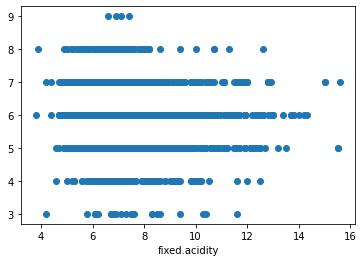

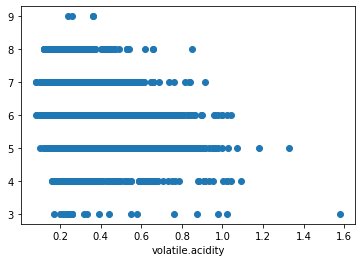

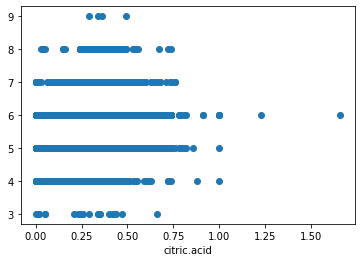

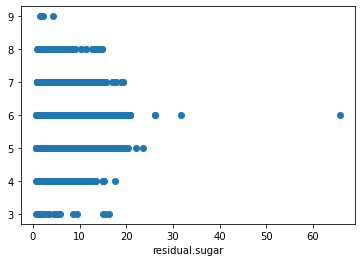

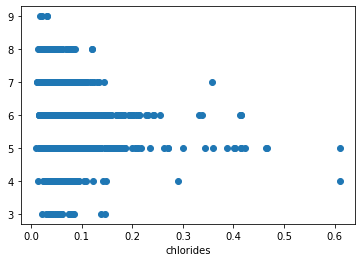

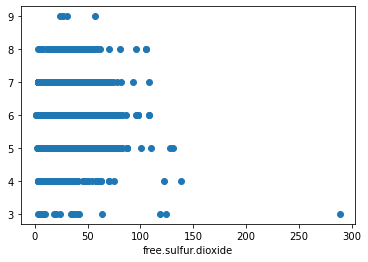

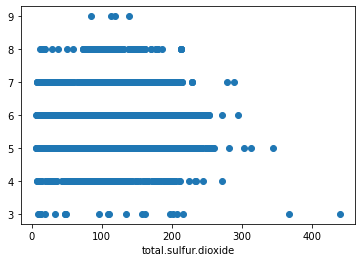

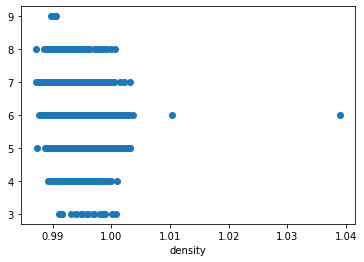

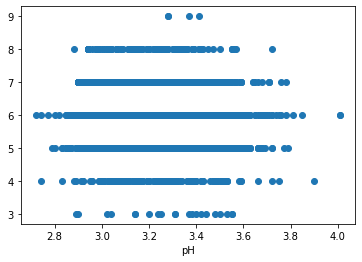

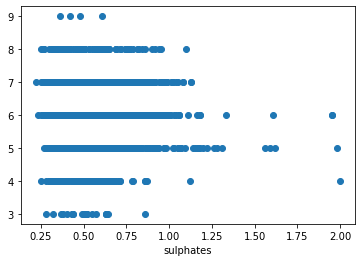

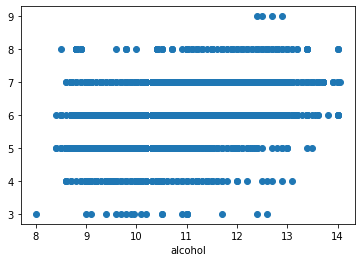

In [20]:
for i in range(X_train.shape[1]):
    plt.figure()
    plt.scatter(X_train[:,i], y_train)
    plt.xlabel(list(train_set.columns[1:-1])[i])

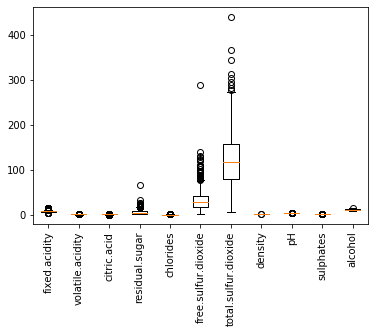

In [354]:
plt.figure()
plt.boxplot(X_train)
plt.xticks(range(1,12),list(train_set.columns[1:-1]), rotation=90)
plt.show()

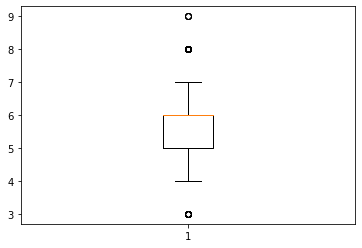

In [290]:
plt.figure()
plt.boxplot(y_train)
plt.show()

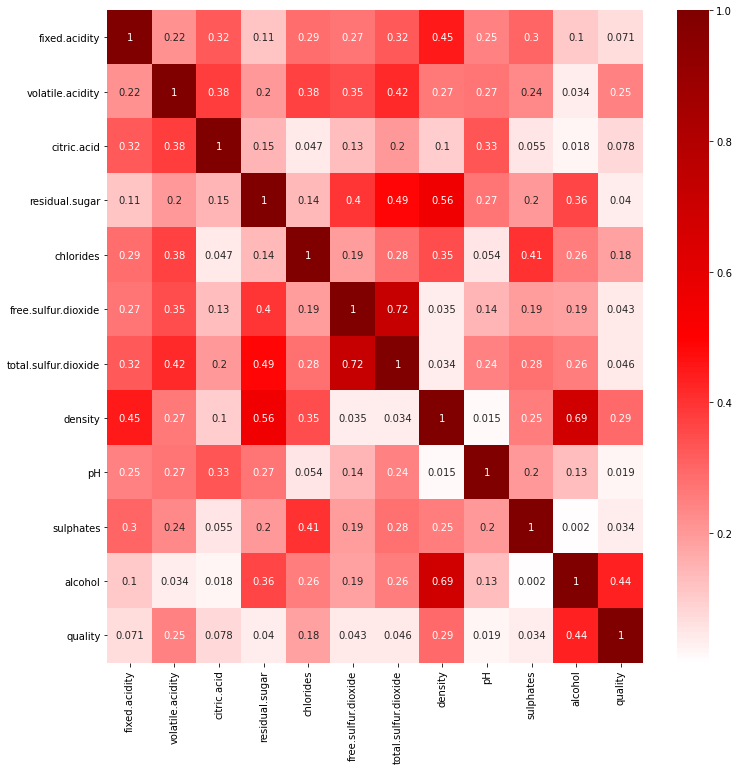

In [21]:
# save correlations to variable
import seaborn as sns
corr = train_set[list(train_set.columns[1:])].corr()
# we can create a mask to not show duplicate values
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
# generate heatmap
plt.figure(figsize=(12,12))
g = sns.heatmap(np.abs(corr), annot=True, center=0, cmap='seismic')
g.set_ylim(12,0)
plt.show()

In [22]:
for i in range(X_train.shape[1]):
    X_train[:,i]=(X_train[:,i]-np.min(X_train[:,i]))/(np.max(X_train[:,i])-np.min(X_train[:,i]))#(X_train[:,i]-np.mean(X_train[:,i]))/(np.std(X_train[:,i]))
for i in range(X_test.shape[1]):
    X_test[:,i]=(X_test[:,i]-np.min(X_train[:,i]))/(np.max(X_train[:,i])-np.min(X_train[:,i]))#(X_test[:,i]-np.mean(X_test[:,i]))/(np.std(X_test[:,i]))

In [23]:
for i in range(X_train.shape[1]):
    X_train[:,i]=(X_train[:,i]-np.mean(X_train[:,i]))/(np.std(X_train[:,i]))
for i in range(X_test.shape[1]):
    X_test[:,i]=(X_test[:,i]-np.mean(X_test[:,i]))/(np.std(X_test[:,i]))

In [24]:
from astropy.stats import median_absolute_deviation
for i in range(X_train.shape[1]):
    X_train[:,i]=(X_train[:,i]-np.median(X_train[:,i]))/(median_absolute_deviation(X_train[:,i]))
for i in range(X_test.shape[1]):
    X_test[:,i]=(X_test[:,i]-np.median(X_test[:,i]))/(median_absolute_deviation(X_test[:,i]))

In [25]:
accuracies_test = []
accuracies_train = []
for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies_test.append(np.round(knn.score(X_test, y_test), 2))
    accuracies_train.append(np.round(knn.score(X_train, y_train), 2))

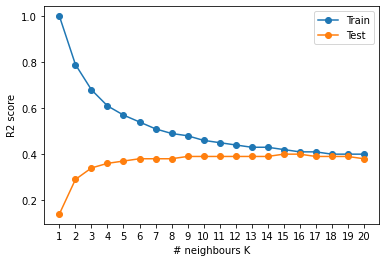

In [26]:
plt.plot(np.arange(1,21),accuracies_train, marker="o", label="Train")
plt.plot(np.arange(1,21),accuracies_test, marker="o", label = "Test")
_ = plt.xticks(np.arange(1,21))
plt.xlabel("# neighbours K")
plt.ylabel("R2 score")
plt.legend()

In [27]:
accuracies_train[9]

0.46

In [28]:
np.sort(accuracies_test)

array([0.14, 0.29, 0.34, 0.36, 0.37, 0.38, 0.38, 0.38, 0.38, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.4 , 0.4 ])

In [29]:
np.argsort(accuracies_test)

array([ 0,  1,  2,  3,  4,  7, 19,  5,  6,  8, 18, 10, 11, 12, 13, 16, 17,
        9, 14, 15], dtype=int64)

In [30]:
reg = LinearRegression().fit(X_train, y_train)
print("Score on the training set: {}".format(reg.score(X_train, y_train)))
print("Score on the testing set: {}".format(reg.score(X_test, y_test)))

Score on the training set: 0.2760977537347614
Score on the testing set: 0.33696184682259145


In [31]:
reg.coef_

array([ 0.03936311, -0.10547679, -0.008934  ,  0.07023466, -0.00178902,
        0.07037317, -0.09456261, -0.11170417,  0.04409932,  0.05414158,
        0.24563634])

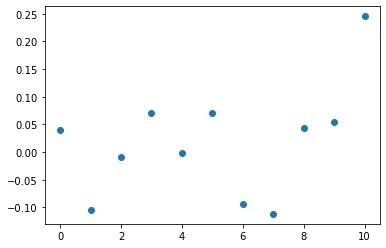

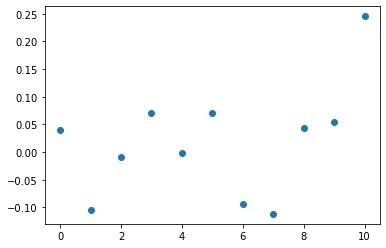

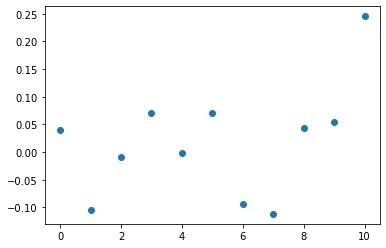

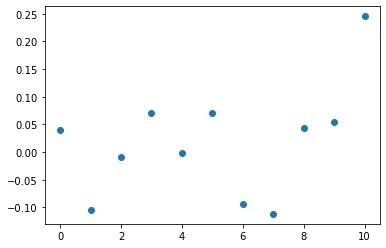

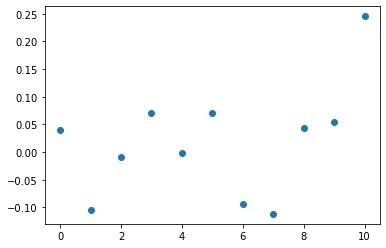

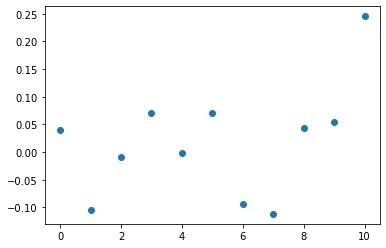

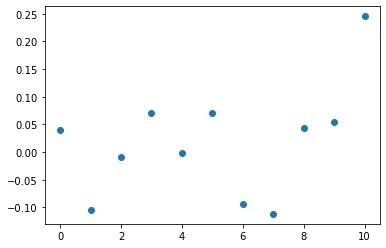

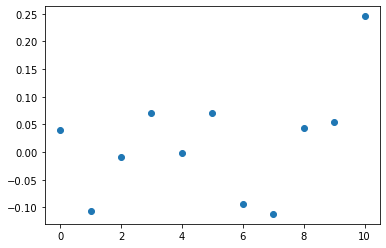

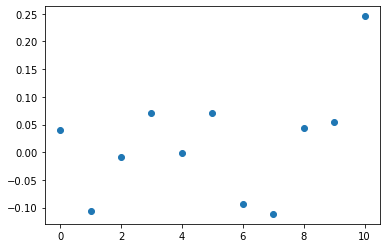

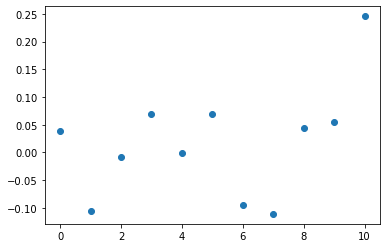

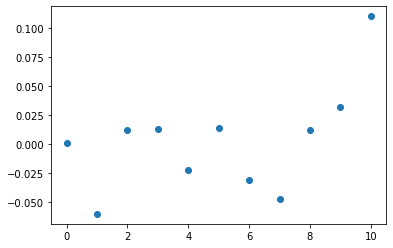

In [52]:
accuracies_test = []
accuracies_train = []
alpha_rng = [0, 0.001, 0.1,0.2,0.3,0.4,0.5,1.0,1.5,2.0,3.0]
for i in alpha_rng:
    reg2 = Ridge(alpha=i).fit(X_train, y_train)
    accuracies_test.append(np.round(reg2.score(X_test, y_test), 2))
    accuracies_train.append(np.round(reg2.score(X_train, y_train), 2))
    plt.figure()
    plt.plot(reg2.coef_, 'o')

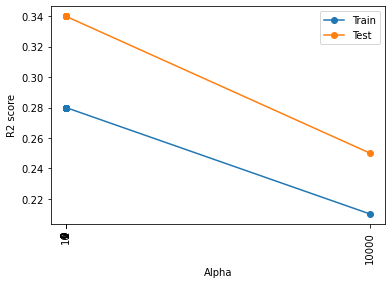

In [53]:
plt.plot(alpha_rng,accuracies_train, marker="o", label="Train")
plt.plot(alpha_rng,accuracies_test, marker="o", label = "Test")
_ = plt.xticks(alpha_rng, rotation=90)
plt.xlabel("Alpha")
plt.ylabel("R2 score")
plt.legend()

<ipython-input-41-3f17615810fa>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg3 = Lasso(alpha=i).fit(X_train, y_train)
C:\Users\15025\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\15025\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1332.7039610821998, tolerance: 0.3681999794745485
  model = cd_fast.enet_coordinate_descent(


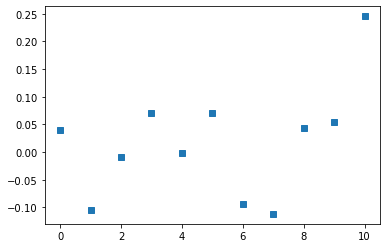

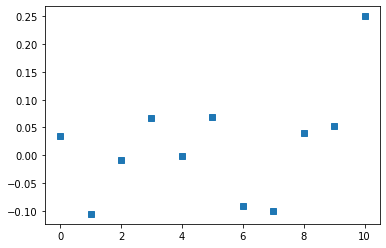

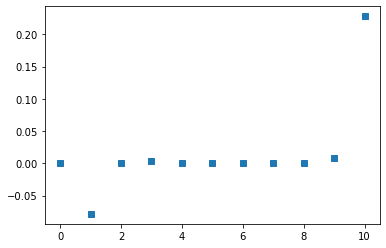

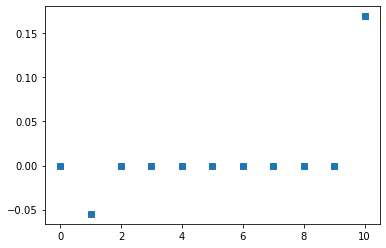

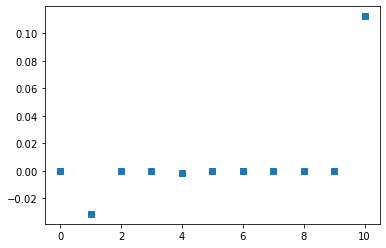

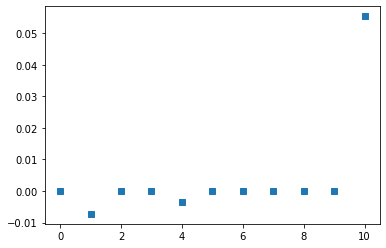

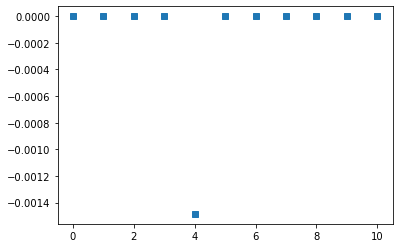

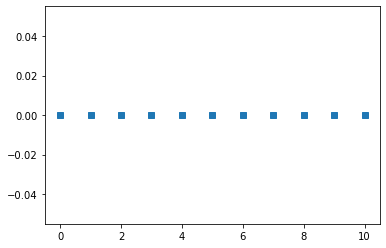

In [41]:
accuracies_test = []
accuracies_train = []
alpha_rng = [0.0, 0.001, 0.1,0.2,0.3,0.4,0.5,1.0]
for i in alpha_rng:
    reg3 = Lasso(alpha=i).fit(X_train, y_train)
    accuracies_test.append(np.round(reg3.score(X_test, y_test), 2))
    accuracies_train.append(np.round(reg3.score(X_train, y_train), 2))
    plt.figure()
    plt.plot(reg3.coef_, 's')

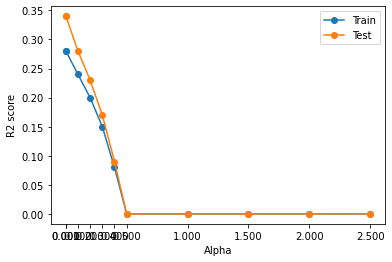

In [40]:
plt.plot(alpha_rng,accuracies_train, marker="o", label="Train")
plt.plot(alpha_rng,accuracies_test, marker="o", label = "Test")
_ = plt.xticks(alpha_rng)
plt.xlabel("Alpha")
plt.ylabel("R2 score")
plt.legend()